<a href="https://colab.research.google.com/github/arezyapova/projects/blob/main/project_aa_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [ ]:
df = pd.read_csv('/home/jupyter-a.rezjapova-13/stat_10/hw_aa.csv', sep = ';')

In [ ]:
df.groupby('version').agg({'purchase':'sum'})

,purchase
version,
v2.8.0,1936
v2.9.0,1748
v3.7.4.0,518
v3.8.0.0,712


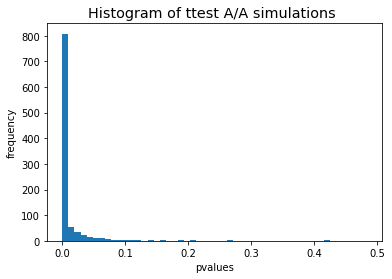

0.934

In [ ]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

In [ ]:
exp_by_version = df.groupby(['experimentVariant','version']).agg({'purchase':'sum', 'uid':'count'})

In [ ]:
exp_by_version['conv'] = np.round(exp_by_version['purchase']/exp_by_version['uid'] * 100, 2)

In [ ]:
exp_by_version

purchase    uid  conv
experimentVariant version                        
0                 v2.8.0          41  41283  0.10
                  v2.9.0         890  11921  7.47
                  v3.7.4.0       252   4204  5.99
                  v3.8.0.0       328   5694  5.76
1                 v2.8.0        1895  41552  4.56
                  v2.9.0         858  12033  7.13
                  v3.7.4.0       266   4221  6.30
                  v3.8.0.0       384   6110  6.28

    Уже по группировке в таблице выше видно, что сильнее всего конверсия различается в версии v2.8.0 (0.1% в контрольной и 4.56% в тестовой группах). Теперь пересчитаем FPR для каждой версии, чтобы убедиться в этом еще раз.

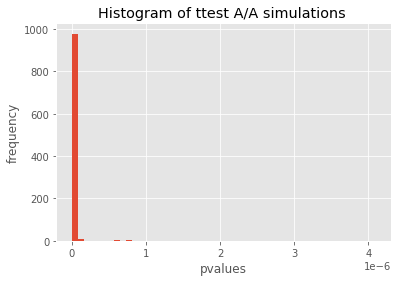

1.0

In [ ]:
# Проверка для версии v2.8.0
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1 & version=="v2.8.0"').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0 & version=="v2.8.0"').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

    Снова получился высокий FPR, проверим в других версиях.

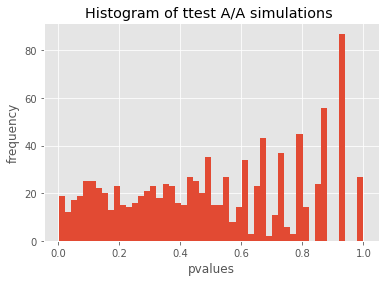

0.037

In [ ]:
# Проверка для версии v2.9.0
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1 & version=="v2.9.0"').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0 & version=="v2.9.0"').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

    Для этой версии получили FPR = 0.037 < 0.05.

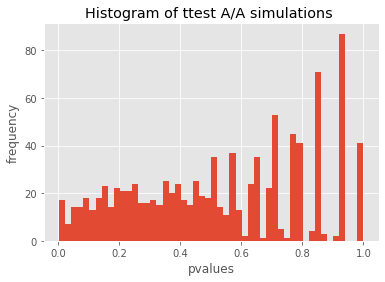

0.029

In [ ]:
# Проверка для версии v3.7.4.0
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1 & version=="v3.7.4.0"').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0 & version=="v3.7.4.0"').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

    Для этой версии v3.7.4.0 получили FPR = 0.029 < 0.05, все в порядке.

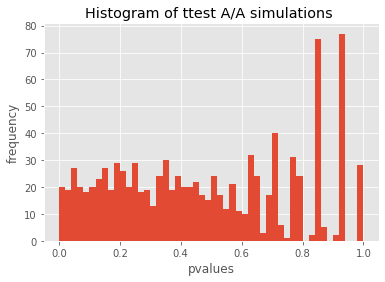

0.051

In [ ]:
# Проверка для версии v3.8.0.0
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1 & version=="v3.8.0.0"').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0 & version=="v3.8.0.0"').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

    Проверка FPR по версиям показала, что проблема в первой версии. Удаляем ее из основного датафрейма.

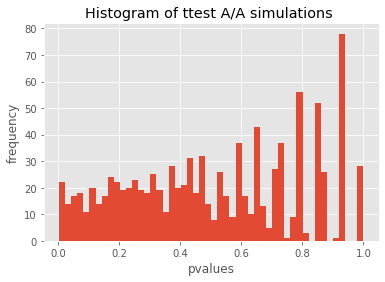

0.038

In [ ]:
# Проверка без версии v2.8.0
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant==1 & version!="v2.8.0"').sample(n_s, replace = False).purchase
    s2 = df.query('experimentVariant==0 & version!="v2.8.0"').sample(n_s, replace = False).purchase
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR
sum(np.array(res) <0.05) / simulations

    Получили FPR < 0.05 и исправили A/A тест